In [1]:
import gymnasium as gym
from gymnasium import spaces
import json
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # 필요한 모듈을 가져옵니다.

from matplotlib.backends.backend_agg import FigureCanvasAgg

In [2]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import A2C, PPO, DQN
from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker

from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.logger import configure
from stable_baselines3.common.callbacks import EvalCallback
from sb3_contrib.common.maskable.callbacks import MaskableEvalCallback

In [3]:
from scheduler_env.customEnv_repeat import SchedulingEnv
from train.train_model import train_model
from train.make_env import make_env

In [4]:
from train.test_model import test_model

In [5]:
import warnings
# 특정 경고를 무시하도록 필터를 설정합니다.
warnings.filterwarnings("ignore", category=Warning)

In [6]:
cost_list = [5, 1, 2, 10]
profit_per_time = 10
max_time = 150

env1, env_name = make_env(num_machines = 8, num_jobs = 12, max_repeats = 12, repeat_means = [3] * 12, repeat_stds = [1] * 12, test_mode = False, cost_list = cost_list, profit_per_time = profit_per_time, max_time = max_time)

In [7]:
check_env(env1)

In [8]:
cost_list = [5, 2, 1, 10]
profit_per_time = 10
max_time = 150

env2, env_name = make_env(num_machines = 8, num_jobs = 12, max_repeats = 12, repeat_means = [3] * 12, repeat_stds = [1] * 12, test_mode = True, cost_list = cost_list, profit_per_time = profit_per_time, max_time = max_time)

In [9]:
# Define your environments (env1 and env2 should be your custom environments)
env1_lambda = lambda: env1
env2_lambda = lambda: env2

# List of environments
env_list = [env1_lambda, env2_lambda]
vec_env = SubprocVecEnv(env_list)  # Or use DummyVecEnv(env_list) for simple parallel execution

In [10]:
env1.show_env_info()

,Operation Type,Total Count,Avg Duration,Std Duration,Machine Count
0,A,17,2.41,1.19,3
1,B,23,1.87,0.45,3
2,C,18,2.06,1.13,3
3,D,21,2.48,1.18,4


In [11]:
env1.show_job_info()

,Job Name,Mean Duration,Std Duration,# of Ops,Mean Deadline,Std Deadline,Repeats
0,Job 1,1.50,0.87,4,9.00,0.000000,1
1,Job 2,2.00,0.82,3,15.67,4.496913,3
2,Job 3,2.33,0.94,3,13.00,3.000000,2
3,Job 4,2.33,1.25,3,14.00,3.000000,2
4,Job 5,2.00,0.82,3,9.00,0.000000,1
5,Job 6,2.00,0.82,3,15.25,5.309190,4
6,Job 7,2.33,1.25,3,12.00,2.000000,2
7,Job 8,3.33,1.70,3,18.50,3.500000,2
8,Job 9,1.67,0.47,3,9.00,2.000000,2
9,Job 10,2.00,0.00,3,11.50,2.500000,2


In [12]:
model = train_model(vec_env, "Env_8_12_3_1_", version = "v8")

Logging to ./logs/tmp/Env_8_12_3_1_
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 806  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 4096 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 636         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.017574538 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.27       |
|    explained_variance   | -0.0405     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.661       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0268     |
|    value_loss           | 25.2        |
-----------------------

In [16]:
!tensorboard --logdir=./logs/tmp/Env_8_12_3_1_

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [29]:
policy_kwargs = dict(
    net_arch=[256, 64]
)

model = MaskablePPO.load("MP_Env_8_12_3_1_v8", env=vec_env, policy_kwargs=policy_kwargs)

Current Repeats			:	[2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 4, 2]
Goal reached! Final score	:	20.33
Total revenue			:	1830.00 - 1458.00 = 372.00
Sum of Costs			:	1458.00
Cost Deadline			:	705.00
Cost Hole			:	17.00
Cost Processing			:	366.00
Cost Makespan			:	370.00
Finish Time / Target Time	:	3700 / 2287
Average Tardiness:	408.93


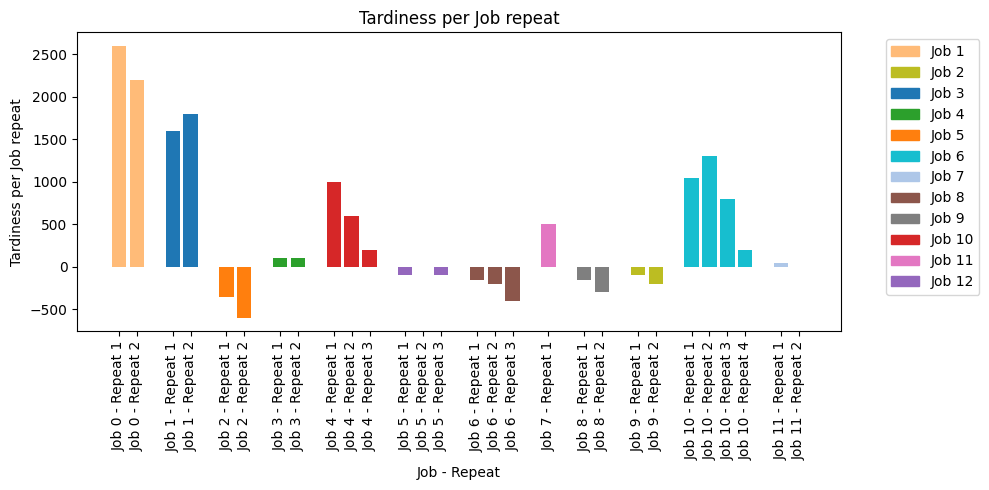

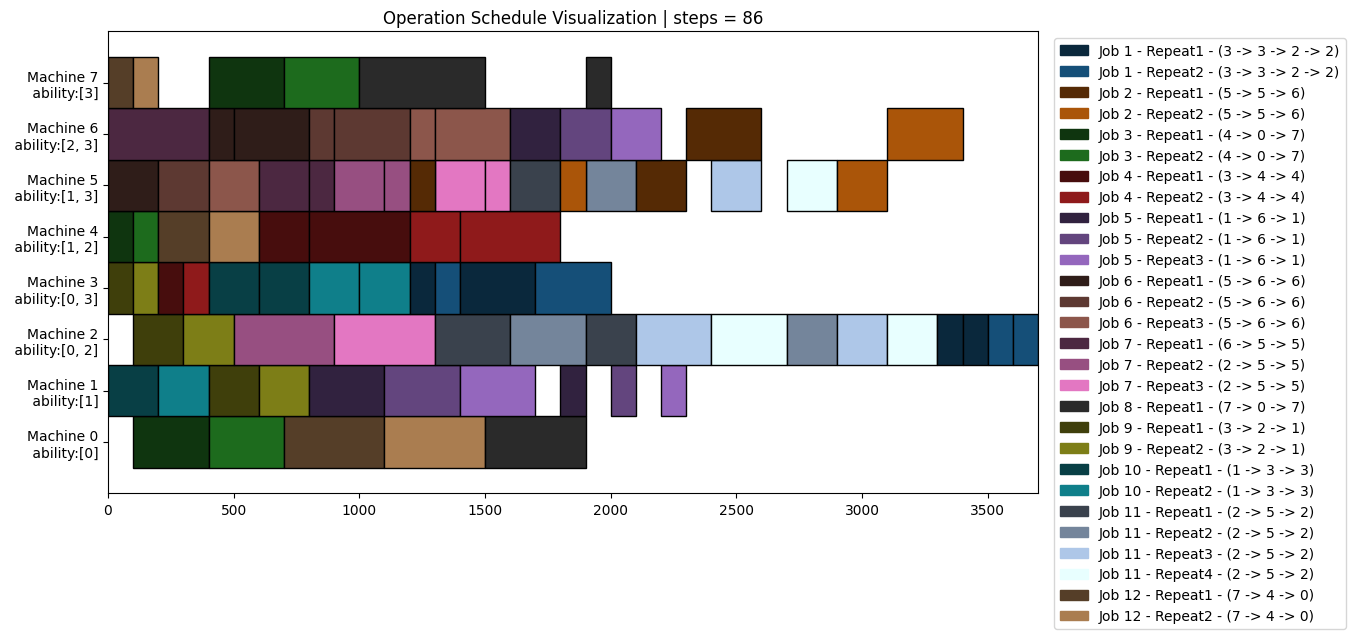




---------------------------Random Simmulation---------------------------
Current Repeats			:	[2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 4, 2]
Goal reached! Final score	:	-29.26
Total revenue			:	1830.00 - 2365.50 = -535.50
Sum of Costs			:	2365.50
Cost Deadline			:	1472.50
Cost Hole			:	77.00
Cost Processing			:	366.00
Cost Makespan			:	450.00
Finish Time / Target Time	:	4500 / 2287
Average Tardiness:	1008.93


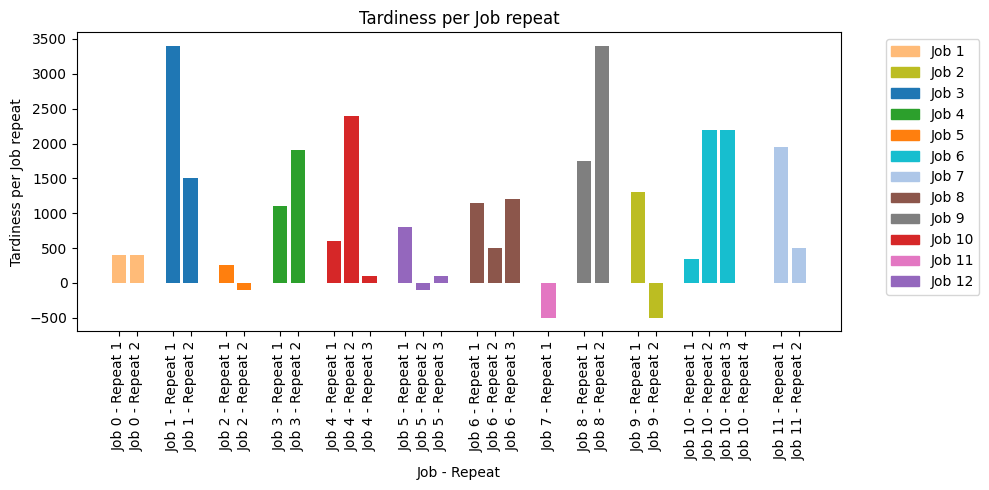

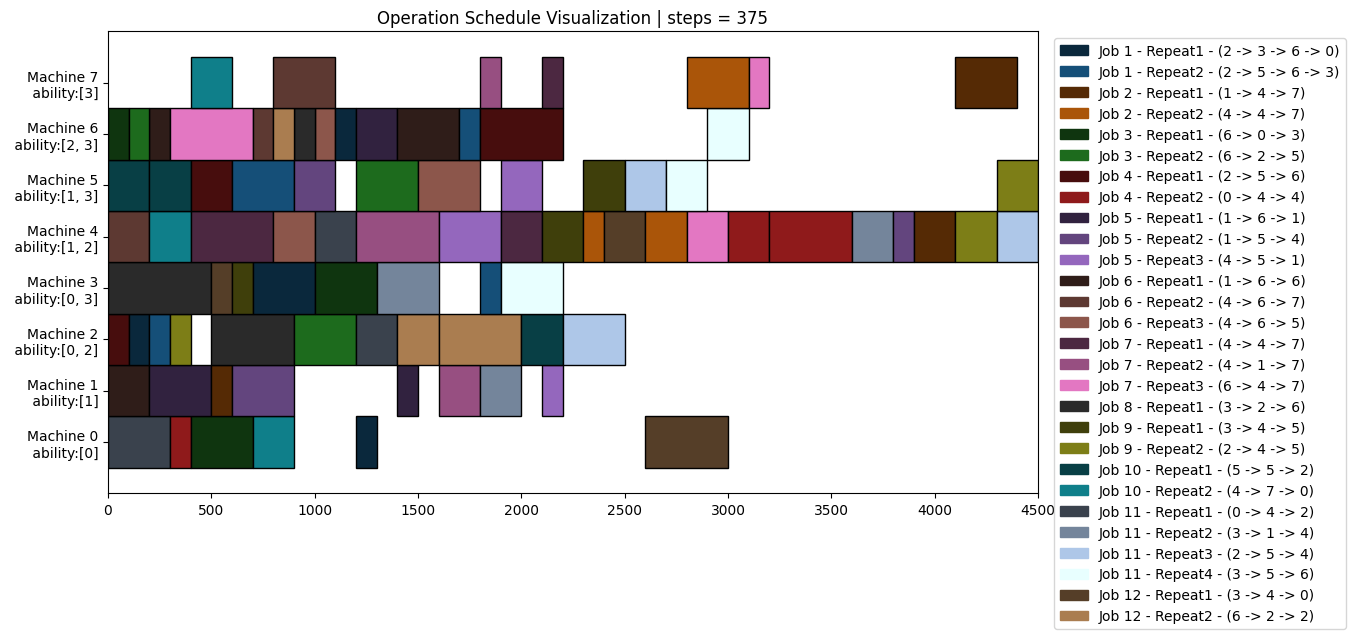

In [30]:
test_model(env = env1, model = model)

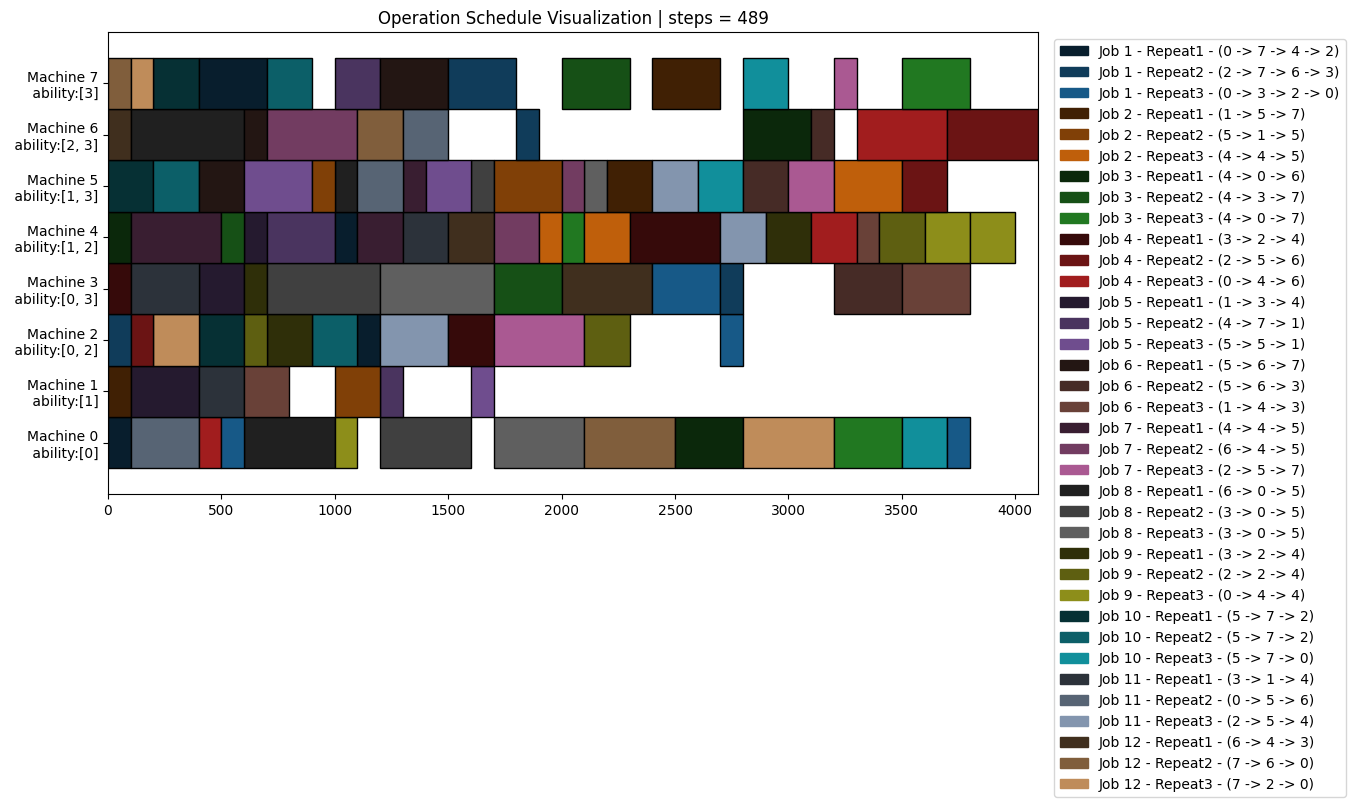

[[ 1  1  1 ...  0  0 -1]
 [ 1  1  1 ...  0  0 -1]
 [ 1  1  1 ...  0  0 -1]
 ...
 [ 1  1  1 ...  0  0 -1]
 [ 1  1  1 ...  0  0 -1]
 [ 1  1  1 ...  0  0 -1]]


In [17]:
step = 0
obs, info = env2.reset()

while True:
    step += 1
    action = env2.action_space.sample()
    obs, reward, terminated, truncated, info = env2.step(action)
    done = terminated or truncated
    if done:
        env2.render()
        print(info["heatmap"])
        break

[ True False False  True False False False False  True False  True False
 False  True False False  True  True False False False  True False False
  True False  True  True False False  True False  True False  True False
  True False False  True False False False  True  True False  True  True
 False  True  True False  True  True  True False False  True False False
 False  True False False  True  True False  True False  True False  True
 False False  True False False False  True  True False False False  True
 False False False False False False False  True False False False  True]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0]]


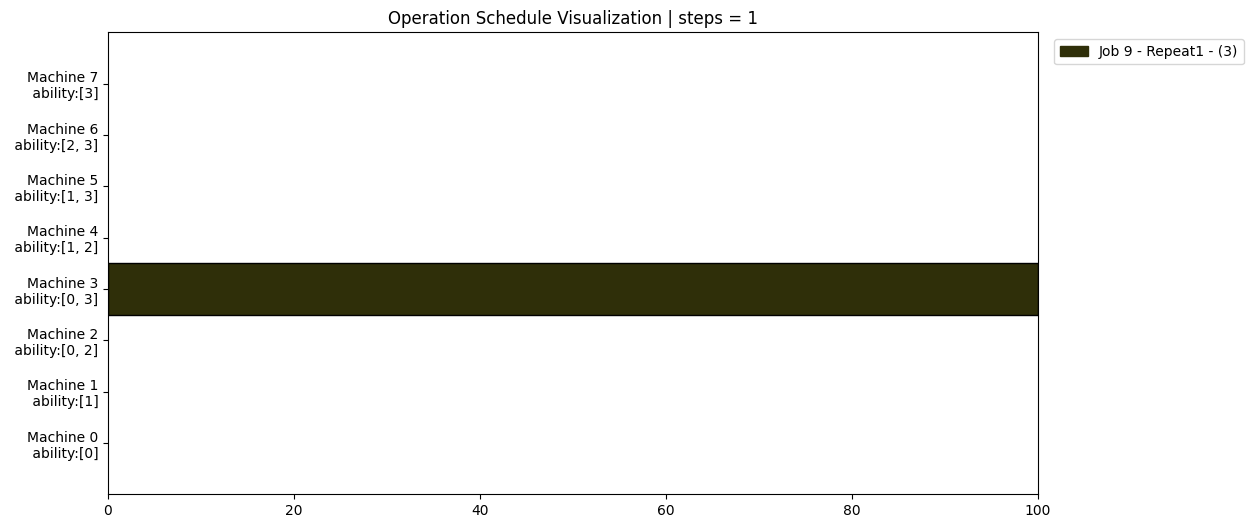

[ True False False  True False False False False False False  True False
 False  True False False  True  True False False False  True False False
  True False  True  True False False  True False  True False  True False
  True False False  True False False False  True False False  True  True
 False  True  True False  True  True  True False  True  True False False
 False  True False False  True  True False  True False  True False  True
 False False  True False False False  True  True  True False False  True
 False False False False False False False  True False False False  True]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0]]


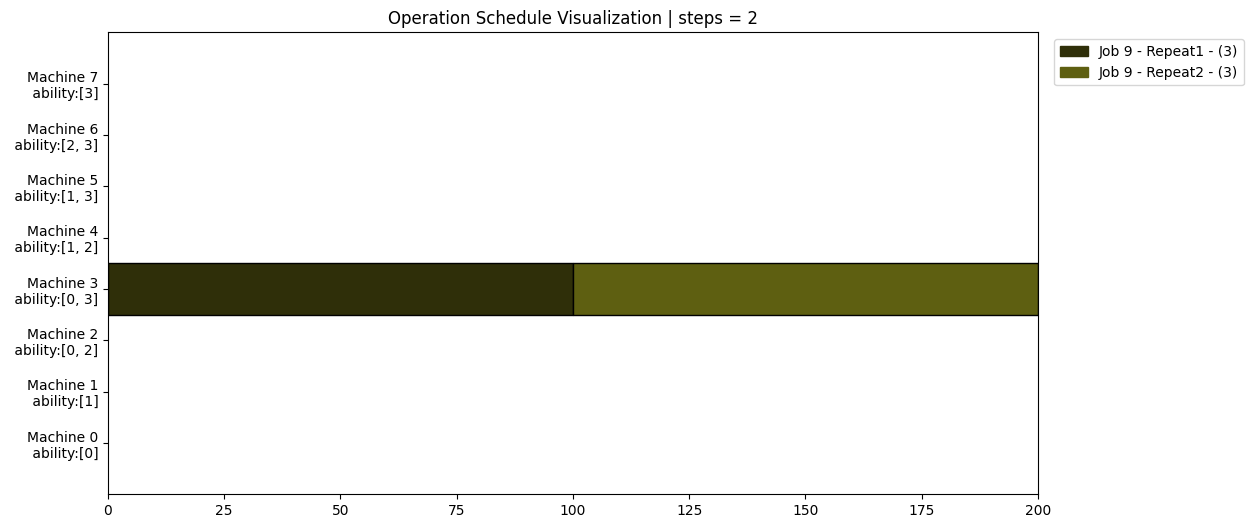

[ True False False  True False False False False False False  True False
 False  True False False  True  True False False False  True False False
  True False  True  True False False  True False  True False  True False
  True False False  True False False False  True False False  True  True
 False  True  True False  True  True  True False  True  True False False
 False  True False False  True  True False  True False  True False  True
 False False  True False False False  True  True  True False False  True
 False False False False False False False  True False False False  True]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [1, 0]]


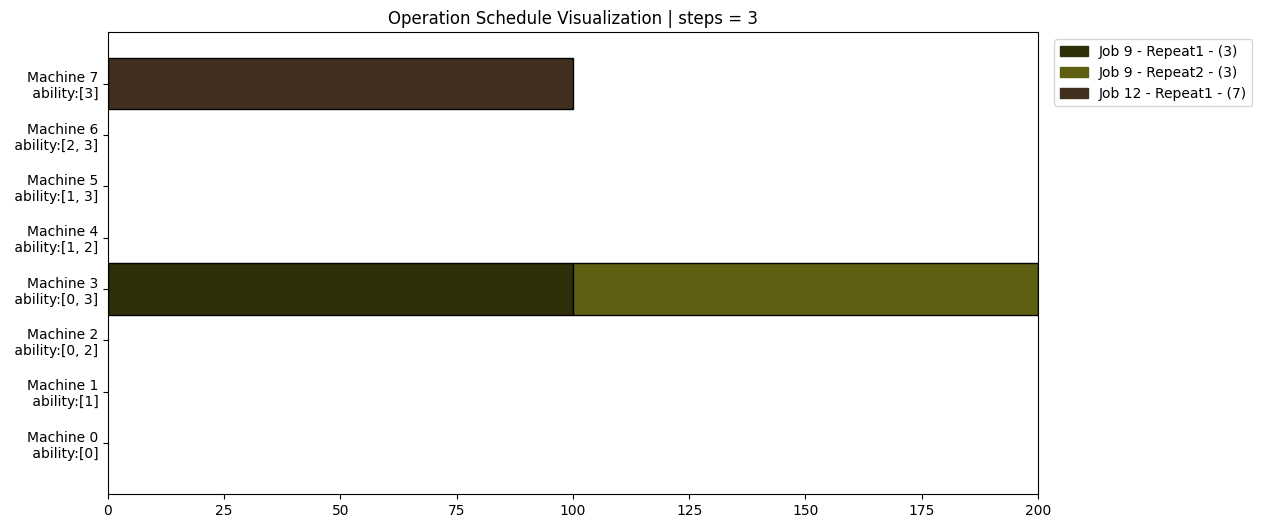

[ True False False  True False False False False False False  True False
 False  True False False  True  True False False False  True False False
  True False  True  True False False  True False  True False  True False
  True False False  True False False False  True False False  True  True
 False  True  True False  True  True  True False  True  True False False
 False  True False False  True  True False  True False  True False  True
 False False  True False False False  True  True  True False False  True
 False False False False False False False  True False False False  True]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [2, 0]]


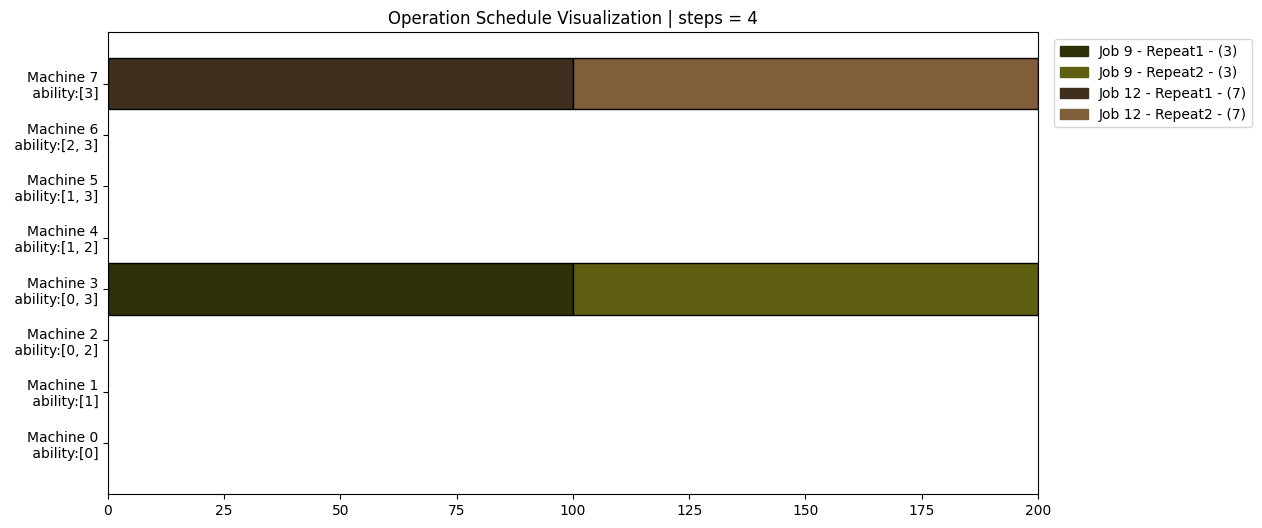

[ True False False  True False False False False False False  True False
 False  True False False  True  True False False False  True False False
  True False  True  True False False  True False  True False  True  True
  True False False  True False False False  True False False  True False
 False  True  True False  True  True  True False  True  True False  True
 False  True False False  True  True False  True False  True False False
 False False  True False False False  True  True  True False False  True
 False False False False False False False  True False False False False]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 1]]


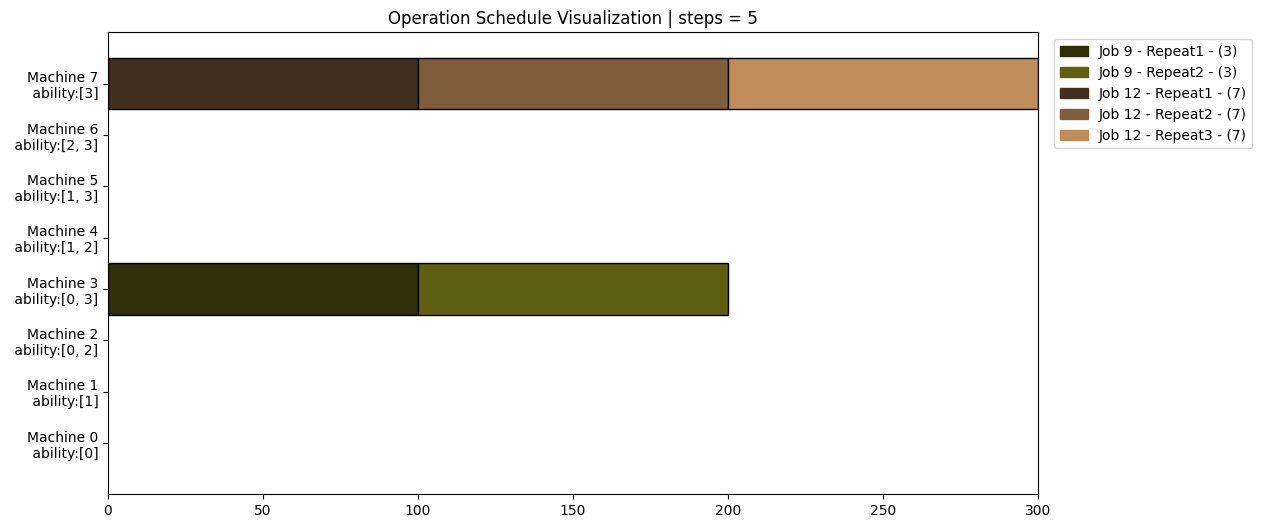

Current Repeats			:	[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Goal reached! Final score	:	24.29
Total revenue			:	2400.00 - 1817.00 = 583.00
Sum of Costs			:	1817.00
Cost Deadline			:	1135.00
Cost Hole			:	52.00
Cost Processing			:	240.00
Cost Makespan			:	390.00
Finish Time / Target Time	:	3900 / 3000
Job 1 - Repeat 1		:	Tardiness/Deadline = 1900/900
Job 1 - Repeat 2		:	Tardiness/Deadline = 1500/1500
Job 1 - Repeat 3		:	Tardiness/Deadline = 1300/1900
Job 2 - Repeat 1		:	Tardiness/Deadline = 2300/1000
Job 2 - Repeat 2		:	Tardiness/Deadline = 2000/1600
Job 2 - Repeat 3		:	Tardiness/Deadline = 1800/2100
Job 3 - Repeat 1		:	Tardiness/Deadline = -350/1050
Job 3 - Repeat 2		:	Tardiness/Deadline = -600/1600
Job 3 - Repeat 3		:	Tardiness/Deadline = -1000/2300
Job 4 - Repeat 1		:	Tardiness/Deadline = 400/1100
Job 4 - Repeat 2		:	Tardiness/Deadline = 400/1700
Job 4 - Repeat 3		:	Tardiness/Deadline = 500/2200
Job 5 - Repeat 1		:	Tardiness/Deadline = 1000/900
Job 5 - Repeat 2		:	Tardiness/Deadline = 1

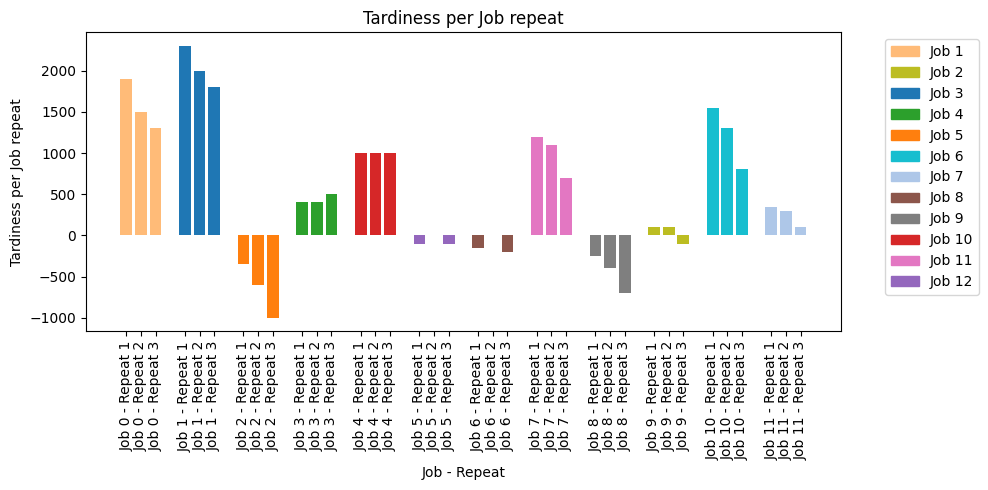

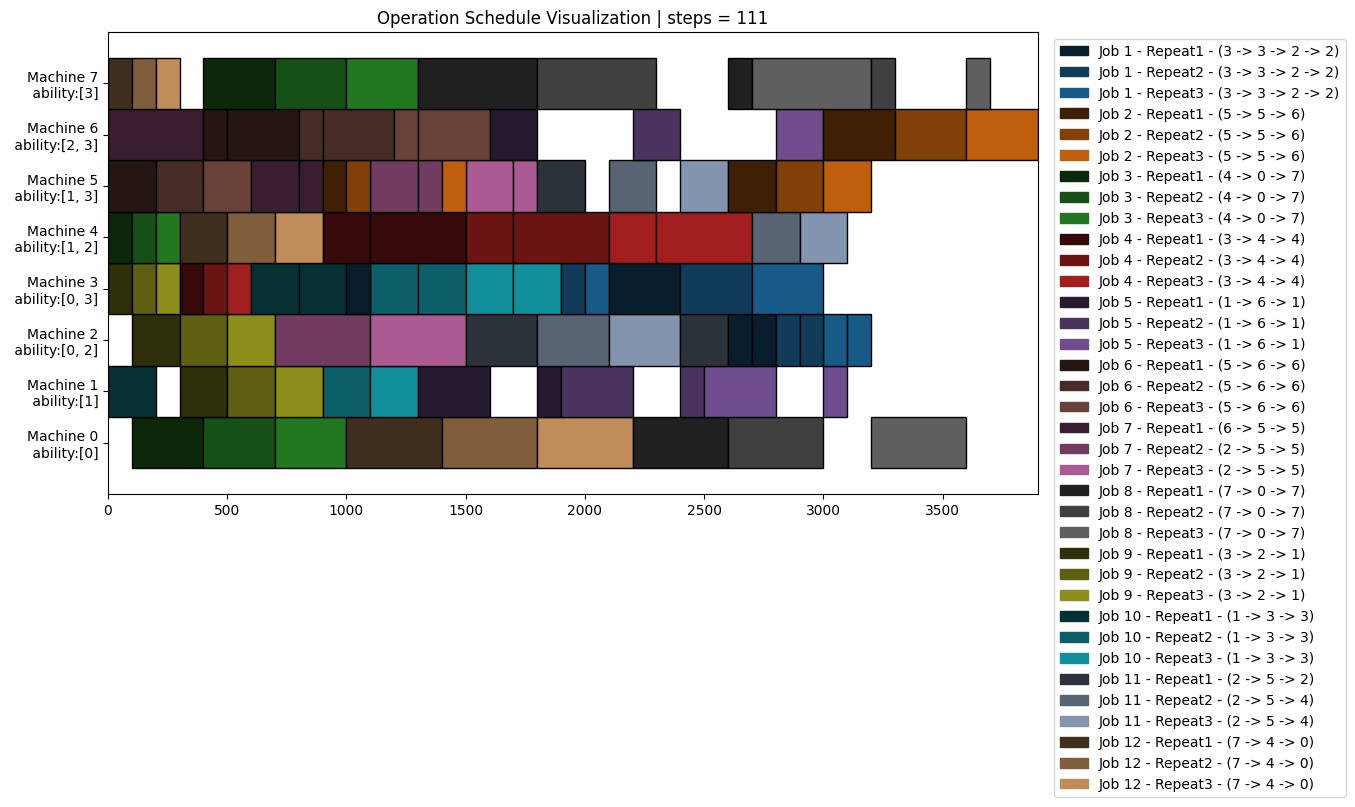

In [31]:
env = env2
count = 0
obs, info = env.reset()
    
while True:
    action_masks = env.action_masks()
    action, _states = model.predict(obs, action_masks=action_masks, deterministic = True)
    obs, reward, terminated, truncated, info = env.step(action)
    count += 1
    done = terminated or truncated
    # env.render()
    if 1 <= count <= 5:
        print(info["action_mask"])
        print(info["schedule_buffer"])
        env.render()
    
    if done:    
        info["reward"] = reward
        info["env"] = env
        info["profit_ratio"] = env.profit_per_time

        env.print_result(info, detail_mode = True)
        env.render()
        break

In [22]:
sum([3, 1, 1, 1, 2, 2, 4, 3, 3, 2, 3]) * 3

75

In [27]:
# model = train_model(env, env_name, version = "v1")

In [25]:
import os
import shutil

log_dir = "./logs/tmp/env_5_8_5_1"

# 디렉토리 내 모든 파일과 서브 디렉토리 삭제
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)
    print(f"{log_dir} 디렉토리와 그 안의 모든 내용이 삭제되었습니다.")
else:
    print(f"{log_dir} 디렉토리가 존재하지 않습니다.")

# 디렉토리 재생성 (필요한 경우)
os.makedirs(log_dir, exist_ok=True)
print(f"{log_dir} 디렉토리가 생성되었습니다.")

./logs/tmp/env_5_8_5_1 디렉토리와 그 안의 모든 내용이 삭제되었습니다.
./logs/tmp/env_5_8_5_1 디렉토리가 생성되었습니다.


In [45]:
# model = MaskablePPO.load("models/MP_test_cost_8_12_8_step")